# Post-Hoc Explainability in Shallow ML - Support Vector Machines with Python

by Emil Vassev

April 20, 2023
<br><br>
Copyright (C) 2023 - All rights reserved, do not copy or distribute without permission of the author.
***

## Shallow ML

Specifics:
* feature extraction in Shallow ML is a manual process that requires domain knowledge of the data that we are learning from
* we learn from data described by pre-defined features
* shallow ML models rely on sophisticated learning algorithms, i.e., they require additional layers of explanation

Popular shallow ML models:
* Tree Ensembles and Support Vector Machines
* require the adoption of post-hoc explainability techniques for explaining their decisions
* notable performance in predictive tasks

## Support Vector Machines

* a classification approach - but can be employed in both types of classification and regression problems 
* among the most used ML models due to their excellent prediction and generalization capabilities
* more complex than Tree Ensembles
* construct a hyper-plane or set of hyper-planes in a high or infinite-dimensional space, which can be used for classification, regression, or other tasks such as outlier detection
* objective: **find the decision boundary to separate different classes and maximize the margin**
* a good separation is achieved by the hyperplane that has the largest distance (or functional margin) to the nearest training-data point of any class: the larger the margin, the lower the generalization error of the classifier
* post-hoc explainability techniques:
    * relate what is mathematically described internally in SVMs
    * cover explanation by simplification, local explanations, visualizations and explanations by example

### Elements of SVM

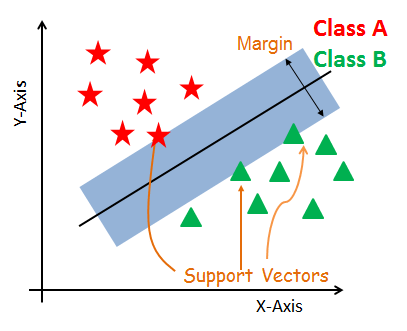

**Hyperplane** - A hyperplane is a decision plane which separates between a set of objects having different class memberships.

**Support Vectors** - The data points closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

**Margin** - A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

## Support Vector Machines with Python

We use the scikit-learn's implementation of SVM: visit https://scikit-learn.org/stable/modules/svm.html


### Step 1: Load Data

In [1]:
#import scikit-learn dataset library
from sklearn import datasets

# Load the IRIS data set
iris = datasets.load_iris()

In [2]:
# print the names of the 13 features
print("Feature labels: ", iris.feature_names)

# print the label type of cancer('malignant' 'benign')
print("Target classes: ", iris.target_names)

Feature labels:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes:  ['setosa' 'versicolor' 'virginica']


In [3]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
X = iris.data
y = iris.target

### Step 2. Show Data

In [5]:
import pandas as pd

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['iris species '] = pd.Series(iris. target)
df_iris.head(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   iris species   
0              0  
1              0  
2              0  
3              0  
4              0  
5              0  
6              0  
7              0  
8              0  
9              0

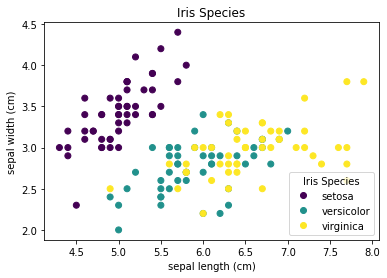

In [6]:
import matplotlib.pyplot as plt

plt.title("Iris Species")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(X[:, 0], X[:, 1], c = y)
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(y.min(), y.max())
handles = [plt.Line2D([0, 0], [0, 0], color=cmap(norm(i)), marker='o', linestyle='', label=label)
           for i, label in enumerate(iris.target_names)]
plt.legend(handles=handles, title='Iris Species')
plt.show()

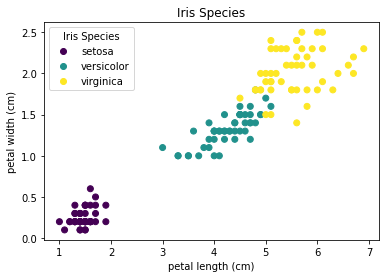

In [7]:
import matplotlib.pyplot as plt

plt.title("Iris Species")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(X[:, 2], X[:, 3], c = y)
cmap = plt.get_cmap('viridis')
norm = plt.Normalize(y.min(), y.max())
handles = [plt.Line2D([0, 0], [0, 0], color=cmap(norm(i)), marker='o', linestyle='', label=label)
           for i, label in enumerate(iris.target_names)]
plt.legend(handles=handles, title='Iris Species')
plt.show()

### Step 3. Split Data

In [8]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) 

### Step 4. Generate Model

We use the **SVC** class (Support Vector Classification) of **sklearn.svm** to generate an svm model.

**Important Hyperparameters**:
* kernel: 
    * Specifies the kernel type to be used in the algorithm.
    * The main function of the kernel is to transform the given dataset input data into the required form.
    * Kernel functions can be linear, polynomial, and radial basis function (RBF). 

In [9]:
#import the svm model
from sklearn import svm

#create an svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#train the model using the training sets
clf.fit(X_train, y_train)


SVC(kernel='linear')

### Step 5. Predict

In [10]:
#predict the response for test dataset
y_pred = clf.predict(X_test)


### Step 6. Evaluate Model

In [11]:
from sklearn import metrics

# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


### Step 7. Generate & Evaluate Model Considering Only Petal Size

In [12]:
import numpy as np

X = np.delete(X, 0, 1)
X = np.delete(X, 0, 1)

# Split dataset into training set and test set
# 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) 

#create an svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#train the model using the training sets
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [13]:
#predict the response for test dataset
y_pred = clf.predict(X_test)

# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9


### Step 8. Draw Maximum Margin Separating Hyperplane

In [14]:
from sklearn.inspection import DecisionBoundaryDisplay

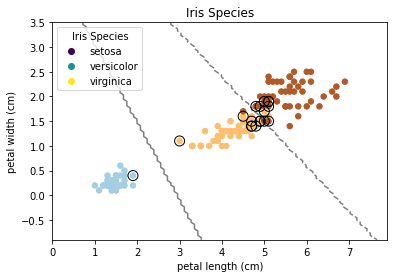

In [15]:
plt.title("Iris Species")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.legend(handles=handles, title='Iris Species')

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()